# Import Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading DataSets

In [2]:
df = pd.read_csv('Social_Network_Ads2.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          209 non-null    int64 
 1   Gender           209 non-null    object
 2   Age              209 non-null    int64 
 3   EstimatedSalary  209 non-null    int64 
 4   Purchased        209 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.3+ KB


In [4]:
df.shape

(209, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,209.0,1.569145e+07,71369.208650,15570769.0,15628972.0,15694288.0,15746737.0,15814816.0
Age,209.0,3.101435e+01,8.126097,18.0,26.0,30.0,35.0,59.0
EstimatedSalary,209.0,6.191388e+04,31911.118282,15000.0,33000.0,59000.0,82000.0,150000.0
Purchased,209.0,1.435407e-01,0.351465,0.0,0.0,0.0,0.0,1.0


In [6]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
204,False,False,False,False,False
205,False,False,False,False,False
206,False,False,False,False,False
207,False,False,False,False,False


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

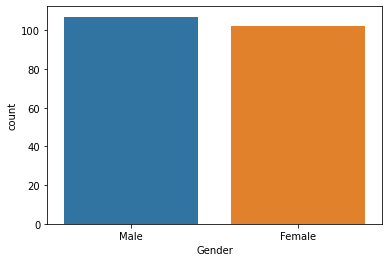

In [8]:
sns.countplot(x = df['Gender'])

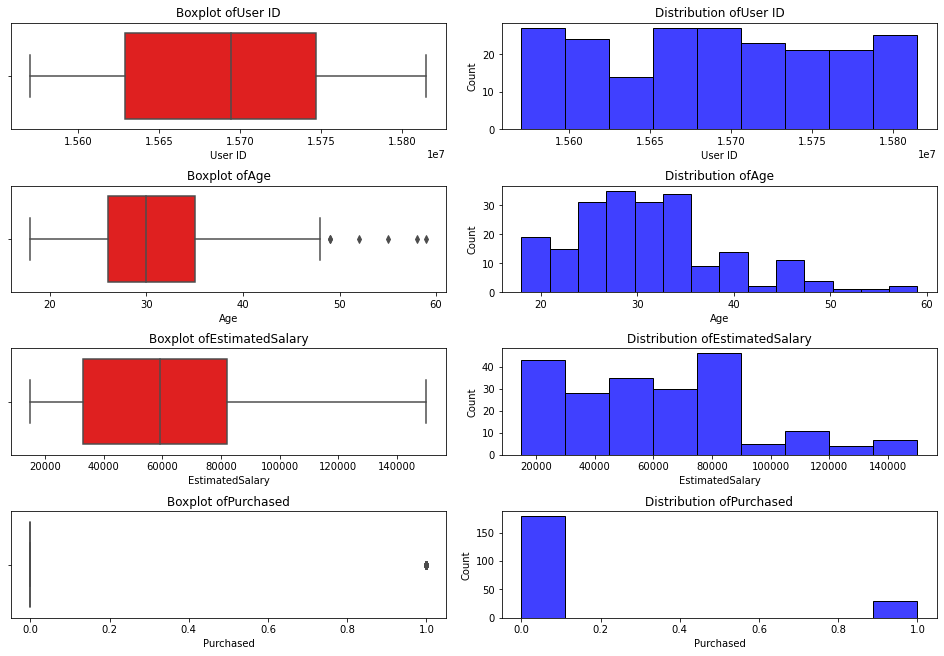

In [9]:
df_gozlem = df.select_dtypes(include=['float64','int64'])
f, axes = plt.subplots(len(df_gozlem.columns),2, constrained_layout=True,figsize=([13,9]))
for i in range(len(df_gozlem.columns)):
    sns.boxplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i,0],color='r')
    axes[i,0].set_title('Boxplot of'+df_gozlem.columns[i])
    sns.histplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i,1], color='b')
    axes[i,1].set_title('Distribution of'+df_gozlem.columns[i])

<AxesSubplot:>

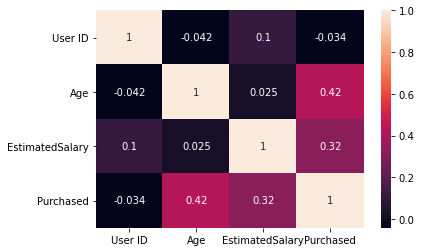

In [10]:
sns.heatmap(df.corr(),annot=True)

# Data Processing

In [11]:
df.drop(["User ID"], axis = 1, inplace = True)

# Mapping the Data

In [12]:
df['Gender'] = np.where(df['Gender'] == "Female",0,1)

In [13]:
y = df['Purchased']
X = df.drop('Purchased',axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
data_scaled = pd.DataFrame(scaled_data)
data_scaled.head()

,0,1,2
0,0.976356,-1.482040,-1.348023
1,0.976356,0.491652,-1.316610
2,-1.024217,-0.618550,-0.594128
3,-1.024217,-0.495194,-0.154356
4,0.976356,-1.482040,0.442477


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.20, random_state=42)

# Fitting In The LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

# Model Evaluation

In [18]:
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.8571428571428571
Train accuracy: 0.8802395209580839


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.50      0.33      0.40         6

    accuracy                           0.86        42
   macro avg       0.70      0.64      0.66        42
weighted avg       0.84      0.86      0.84        42



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


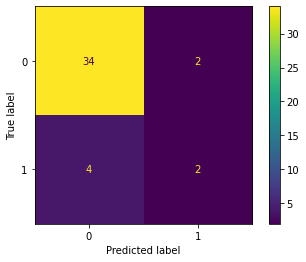

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)